In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
import tensorflow_datasets as tfds
imdb, info = tfds.load(name="imdb_reviews",
                       with_info=True,
                       as_supervised=True)
train_data, test_data = imdb['train'], imdb['test']

In [2]:
train_sentences = []
train_labels = []

test_sentences = []
test_labels = []

In [3]:
for s, l in train_data:
    train_sentences.append(str(s.numpy()))
    train_labels.append(l.numpy())


for s, l in test_data:
    test_sentences.append(str(s.numpy()))
    test_labels.append(l.numpy())


In [4]:
vocab_size = 10_000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_sequences,
                               maxlen=max_length,
                               truncating=trunc_type)

In [7]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding, GlobalAveragePooling1D

model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    input_length=max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


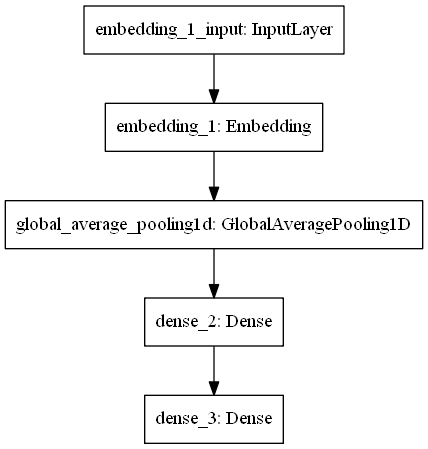

In [8]:
plot_model(model, 'model.png')

In [9]:
padded.shape


(25000, 120)